In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# Read the CSV file into a pandas DataFrame
concat_df = pd.read_csv(r"/home/student/Downloads/clean_concat.csv")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
concat_df['Label'] = label_encoder.fit_transform(concat_df['Label'])

# Suppose your features are stored in X and labels in y
X = concat_df.drop(columns=['Label'])  # Assuming 'Label' is the target column
y = concat_df['Label']

# Scale the features
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(X)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the PCA-transformed data
pca_data = pd.read_csv(r"/home/student/Downloads/pca_transformed_data.csv")

# Extract features (X) from pca_data_df
X = pca_data
y = concat_df['Label']  # Labels


In [3]:
from sklearn.model_selection import train_test_split

# Assume X is your features data, and y is your labels data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Define the hyperparameter distribution for linear kernel
param_dist_linear = {
    'C': loguniform(0.001, 100),
}

# Reduce the number of iterations
n_iter_search_linear = 10

# Create the RandomizedSearchCV object without cross-validation for linear kernel
random_search_linear = RandomizedSearchCV(
    SVC(kernel='linear'),
    param_distributions=param_dist_linear,
    n_iter=n_iter_search_linear,
    scoring='accuracy',
    n_jobs=1,  # Use fewer CPU cores to reduce memory usage
    random_state=42,
    cv=None  # No cross-validation
)

In [6]:
# Fit RandomizedSearchCV on the training data
random_search_linear.fit(X_train, y_train)


RandomizedSearchCV(estimator=SVC(kernel='linear'), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x788ab2a675d0>},
                   random_state=42, scoring='accuracy')

In [7]:
# Get the best hyperparameters 
best_params_linear = random_search_linear.best_params_

In [8]:
# Create the SVM model with the best hyperparameters
best_model_linear = SVC(kernel='linear', C=best_params_linear['C'])


In [9]:
# Train the model on the entire training data
best_model_linear.fit(X_train, y_train)


SVC(C=0.07459343285726544, kernel='linear')

In [10]:
# Evaluate the model on the training and testing data
y_train_pred_linear = best_model_linear.predict(X_train)
y_test_pred_linear = best_model_linear.predict(X_test)

In [11]:

from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# Predict the labels for the training and testing sets
y_train_pred_classes_linear = y_train_pred_linear
y_test_pred_classes_linear = y_test_pred_linear

# Generate classification reports for training and testing sets as dictionaries
train_report_linear = classification_report(y_train, y_train_pred_classes_linear, target_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], output_dict=True)
test_report_linear = classification_report(y_test, y_test_pred_classes_linear, target_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], output_dict=True)

# Calculate accuracy for each class in the training set
for stage in ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']:
    # Find class index
    class_index = list(train_report_linear.keys()).index(stage)
    # Calculate accuracy
    correct_predictions = (y_train == class_index) & (y_train_pred_classes_linear == class_index)
    accuracy = np.sum(correct_predictions) / np.sum(y_train == class_index)
    # Add accuracy to the report
    train_report_linear[stage]['accuracy'] = accuracy

# Calculate accuracy for each class in the testing set
for stage in ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']:
    # Find class index
    class_index = list(test_report_linear.keys()).index(stage)
    # Calculate accuracy
    correct_predictions = (y_test == class_index) & (y_test_pred_classes_linear == class_index)
    accuracy = np.sum(correct_predictions) / np.sum(y_test == class_index)
    # Add accuracy to the report
    test_report_linear[stage]['accuracy'] = accuracy

# Convert the classification reports to DataFrames
train_report_df_linear = pd.DataFrame(train_report_linear).T
test_report_df_linear = pd.DataFrame(test_report_linear).T

# Save the classification reports to CSV files
train_report_df_linear.to_csv("train_report_svm_linear.csv")
test_report_df_linear.to_csv("test_report_svm_linear.csv")

print("Saved the classification reports for SVM with linear kernel.")

Saved the classification reports for SVM with linear kernel.


Learning curve saved to svm_linear_learning_curve.svg


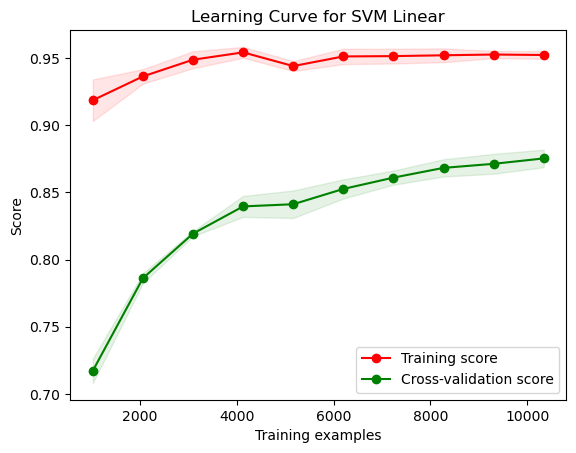

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the number of training examples at which to evaluate the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=best_model_linear,  # Assuming 'best_model_linear' is your SVM linear model
    X=X_train, 
    y=y_train, 
    train_sizes=train_sizes,
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy'  # Evaluation metric
)

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for SVM Linear")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

# Save the learning curve as an SVG file
learning_curve_svg_path = 'svm_linear_learning_curve.svg'  # Specify the file path and name
plt.savefig(learning_curve_svg_path, format='svg')
print(f"Learning curve saved to {learning_curve_svg_path}")


ROC curve saved to svm_linear_roc_curve.svg


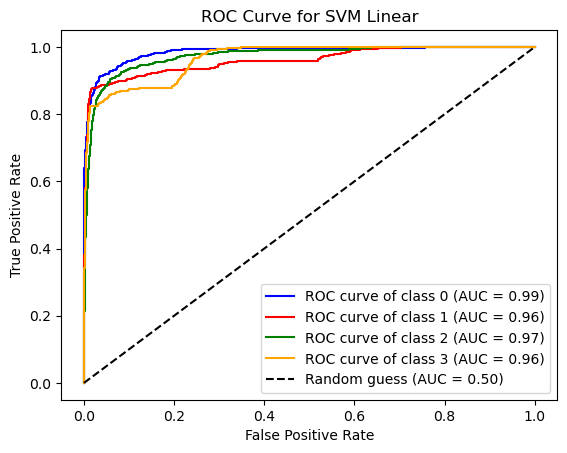

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Obtain decision scores on the test set
decision_scores = best_model_linear.decision_function(X_test)

# Convert the test set labels to one-hot encoding
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust class values as needed

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], decision_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Linear')
plt.legend()

# Save the ROC curve as an SVG file
roc_curve_svg_path = 'svm_linear_roc_curve.svg'  # Specify the file path and name
plt.savefig(roc_curve_svg_path, format='svg')
print(f"ROC curve saved to {roc_curve_svg_path}")


ROC curve saved to svm_linear_roc_curve.svg


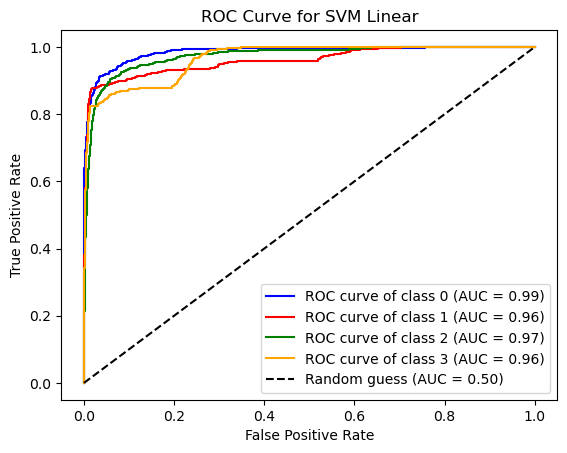

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Obtain decision scores on the test set
decision_scores = best_model_linear.decision_function(X_test)

# Convert the test set labels to one-hot encoding
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust class values as needed

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], decision_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Linear')
plt.legend()

# Save the ROC curve as an SVG file
roc_curve_svg_path = 'svm_linear_roc_curve.svg'  # Specify the file path and name
plt.savefig(roc_curve_svg_path, format='svg')
print(f"ROC curve saved to {roc_curve_svg_path}")


/tmp/ipykernel_129153/4197796423.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_abs, train_loss_mean, 'o-', color="blue", linestyle='dotted',
/tmp/ipykernel_129153/4197796423.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="yellow", linestyle='dotted',


Learning curve saved to svm_linear_learning_curve_custom.svg


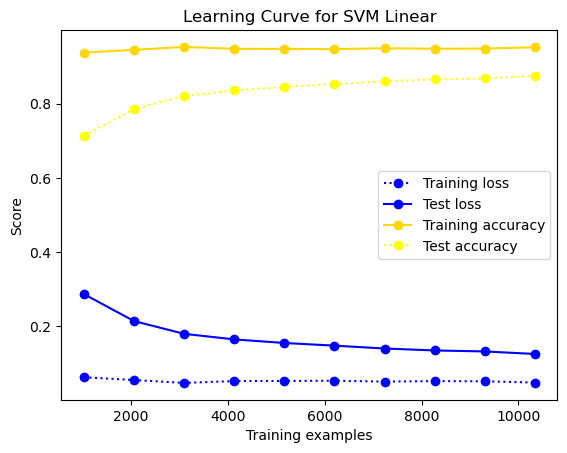

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the number of training examples at which to evaluate the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=best_model_linear,  # Assuming 'best_model_linear' is your SVM linear model
    X=X_train, 
    y=y_train, 
    train_sizes=train_sizes,
    shuffle=True,  # Shuffle data before splitting
    random_state=42,  # Set random state for reproducibility
    scoring='accuracy',  # Evaluation metric
    return_times=False  # Do not return the training times
)

# Calculate mean of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Calculate mean of training and test loss
train_loss_mean = 1 - train_scores_mean
test_loss_mean = 1 - test_scores_mean

# Plot learning curve for accuracy and loss
plt.figure()
plt.title("Learning Curve for SVM Linear")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes_abs, train_loss_mean, 'o-', color="blue", linestyle='dotted',
         label="Training loss")
plt.plot(train_sizes_abs, test_loss_mean, 'o-', color="blue",
         label="Test loss")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="gold",
         label="Training accuracy")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="yellow", linestyle='dotted',
         label="Test accuracy")

plt.legend(loc="best")

# Save the learning curve as an SVG file
learning_curve_svg_path = 'svm_linear_learning_curve_custom.svg'  # Specify the file path and name
plt.savefig(learning_curve_svg_path, format='svg')
print(f"Learning curve saved to {learning_curve_svg_path}")
